In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import missingno as msno

# %matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy.stats import randint



In [3]:
cars = pd.read_csv('cars_cleaned.csv', parse_dates=True, encoding = "ISO-8859-1", low_memory=False, index_col=0)
df = cars

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 32262 non-null  int64  
 1   Model                32262 non-null  object 
 2   Specs                32262 non-null  object 
 3   MSRP                 32262 non-null  int64  
 4   EPA_Class            30286 non-null  object 
 5   Body_Stype           30546 non-null  object 
 6   Drivetrain           30546 non-null  object 
 7   Psg_Cp               32262 non-null  int64  
 8   Psg_Doors            32262 non-null  int64  
 9   Front_Wheel_Mat      30293 non-null  object 
 10  Rear_Wheel_Mat       30293 non-null  object 
 11  Basic_Miles          29879 non-null  float64
 12  Basic_Year           30145 non-null  float64
 13  Drivetrain_Miles     29076 non-null  float64
 14  Drivetrain_Years     29374 non-null  float64
 15  Road_Assist_Miles    19088 non-null 

In [5]:
df.head(3)

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,Acura RDX,Acura RDX Specs: FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3790.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
1,2019,Acura RDX,Acura RDX Specs: FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3829.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
2,2019,Acura RDX,Acura RDX Specs: FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3821.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0


## Visualize missing values

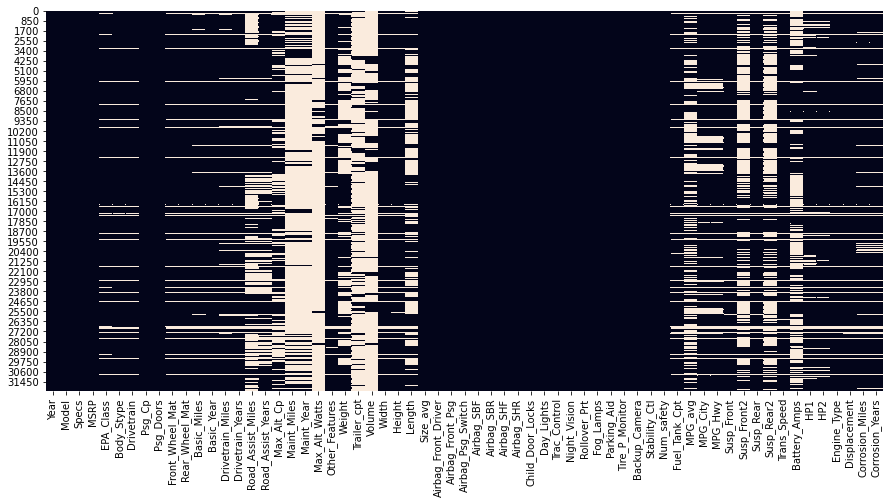

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

- White indicates where values are missing. Key features like Year, Model, MSRP, etc. have complete data availability. However, features that are believed to have great effect on prices like Weight, Volume, Length, etc. have a lot of missing values, which need to be imputed with good strategy.

## Filling some of the missing weight data
Since 'Weigth' data is very important effecting on the price, it is worthwhile to find reasonable ways filling them up.

In [7]:
# keep track of number of missing values before and after imputation
nulls = []
nulls.append(df['Weight'].isnull().sum())
nulls

[12917]

### Mark/locate blocks with missing values for later imputation

In [8]:
# sort for viewing purpose
df = df.sort_values(['Specs', 'Year']).reset_index()

# index of all missing weight values
x = [index for index, row in df[['Weight']].iterrows() if row.isnull().any()]

# for the purpose of getting the start index of a block
y = pd.Series(x).diff()

lst = list(zip(x, y))

# track index for the single missing cell
z = []
for i, j in enumerate(lst):
    if j[1] == 1.0:
        z.append(0)
    else:
        z.append(i)

x = pd.Series(x, name='x')
y = pd.Series(y, name='y')
z = pd.Series(z, name='z')
merged = pd.merge(x, y, left_index=True, right_index=True)
merged = pd.merge(merged, z, left_index=True, right_index=True)

In [9]:
# x: index of all missing values
# y: difference of x
# z: index of blocks with only one missing value
merged

,x,y,z
0,157,NaN,0
1,158,1.0,0
2,159,1.0,0
3,160,1.0,0
4,171,11.0,4
...,...,...,...
12912,32079,1.0,0
12913,32122,43.0,12913
12914,32159,37.0,12914
12915,32170,11.0,12915


In [10]:
# utilize the index of non-zero z to get the length of consecutive cells that have NaN
z2 = [i for i in z if i!=0]
z2.insert(0, 0)
z2 = pd.Series(z2, name='u')

# calculate the length of block of missing values
length = z2.diff()
length = pd.Series(length, name='len')

In [11]:

length2 = pd.merge(z2, length, left_index=True, right_index=True)
length2


,u,len
0,0,NaN
1,4,4.0
2,6,2.0
3,14,8.0
4,15,1.0
...,...,...
753,12898,4.0
754,12913,15.0
755,12914,1.0
756,12915,1.0


In [12]:
length3 = length2.set_index('u')
length3

,len
u,
0,NaN
4,4.0
6,2.0
14,8.0
15,1.0
...,...
12898,4.0
12913,15.0
12914,1.0


In [13]:
length3.sort_values(['len'], ascending=False)

,len
u,
7539,1629.0
4579,1277.0
2303,1219.0
5693,1070.0
11071,946.0
...,...
8274,1.0
8273,1.0
8237,1.0


In [14]:
m = pd.merge(merged, length3, how='left', left_index=True, right_index=True)
m

,x,y,z,len
0,157,NaN,0,NaN
1,158,1.0,0,NaN
2,159,1.0,0,NaN
3,160,1.0,0,NaN
4,171,11.0,4,4.0
...,...,...,...,...
12912,32079,1.0,0,NaN
12913,32122,43.0,12913,15.0
12914,32159,37.0,12914,1.0
12915,32170,11.0,12915,1.0


In [15]:
m['length'] = m['len'].shift(periods=-1)
# m = m.rename(columns={'shift':'len'})

# Keep the last one in order to keep
lst = len(m) - 1
if m.loc[lst, 'z'] == 0:
    m.loc[lst, 'z'] = len(m) 
    m.loc[lst, 'len'] = m.loc[lst, 'z']  - m.loc[lst-1, 'z'] 
    m.loc[lst, 'length'] = m.loc[lst, 'z']  - m.loc[lst-1, 'z'] 

m['start'] = m['x'] - m['length'] + 1

In [16]:
final = m[['length', 'start']]
final = final.dropna().astype(int)
final = final.reset_index()

In [17]:
# final results of marking the missing blocks
# index: 
final

,index,length,start
0,3,4,157
1,5,2,171
2,13,8,189
3,14,1,269
4,16,2,412
...,...,...,...
752,12897,4,32007
753,12912,15,32065
754,12913,1,32122
755,12914,1,32159


### Use 'Spec' information to impute missing 'Weight'
The entry in 'Specs' is most reliable to infer the car price because it has brand, model and year information that determine the price in a predominant way. Therefore by comparing the the distance of strings between the missing and neighboe, we can make a reasonable guess of weight data. 

In [18]:
""" levenshtein_ratio_and_distance:
    Calculates levenshtein distance between two strings.
    If ratio_calc = True, the function computes the
    levenshtein distance ratio of similarity between two strings
    For all i and j, distance[i,j] will contain the Levenshtein
    distance between the first i characters of s and the
    first j characters of t
"""
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):

    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        # return "The strings are {} edits away".format(distance[row][col])
        return distance[row][col]

In [19]:
# add 10 more rows to df that is the same as the last row, in order to compare 10 strings
temp = df.iloc[-1, :]
i = 0
while i < 10:
    df = df.append(temp, ignore_index=True)
    i += 1

df = df.reset_index(drop=True) # for the newly added rows

In [20]:
%%time 

# calculate distance of 'Specs' strings between the missing and existing neighbors
distance2 = {}
for i in np.arange(final.shape[0]):
    start = final.loc[i, 'start']
    length = final.loc[i, 'length']
    distance1 = {}
    if length < 20:
        for j in np.arange(length):
            for k in np.arange(1, 11):
                str1 = df.loc[start+j, 'Specs'] #to be compared
                str2 = df.loc[start-k, 'Specs'] #backward choose a row for comparison
                if str2==np.nan :
                    break            
                distance1[start-k] = levenshtein_ratio_and_distance(str1, str2)  
            for k in np.arange(1, 11):
                str1 = df.loc[start+j, 'Specs'] #to be compared
                str3 = df.loc[start+length+k-1, 'Specs'] #forward choose a row for comparison
                if str2==np.nan :
                    break 
                distance1[start+length+k-1] = levenshtein_ratio_and_distance(str1, str3)  

            idx = min(distance1, key=distance1.get) # find key for the minumum value in the library
            x = df.loc[idx, 'Weight']
            df.loc[start+j, 'Weight'] = x
    distance2[i] = distance1

# Wall time: 4min 52s

Wall time: 5min 16s


In [21]:
# remove added rows
df = df.iloc[:-10, :]
df

,index,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,230,2016,Acura ILX,Acura ILX Specs: 4-Door Sedan,27900,Compact Cars,4dr Car,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.0,NaN,NaN,NaN,Electronic Stability Control (ESC)\r\r\nABS An...,3093.0,NaN,NaN,70.6,55.6,181.9,102.700000,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11,13.2,29.0,25.0,36.0,Strut,Strut,Multi-Link,Multi-Link,8.0,410.0,180.0,201.0,Premium Unleaded I-4,2.4,300000.0,5.0
1,246,2013,Acura ILX,Acura ILX Specs: 4-Door Sedan 1.5L Hybrid,28900,- TBD -,4dr Car,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Anti-lock braking system (ABS) -inc: electroni...,2959.0,NaN,NaN,70.6,55.6,179.1,101.766667,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,10,13.2,38.0,39.0,38.0,MacPherson Strut,NaN,Multi-Link,NaN,1.0,NaN,127.0,111.0,Gas/Electric I4,1.5,300000.0,5.0
2,240,2014,Acura ILX,Acura ILX Specs: 4-Door Sedan 1.5L Hybrid,28900,Compact Cars,4dr Car,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.0,NaN,NaN,NaN,Electronic Stability Control (ESC)\r\r\nABS An...,2959.0,NaN,NaN,70.6,55.6,179.1,101.766667,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,12,13.2,38.0,39.0,38.0,Strut,Strut,Multi-Link,Multi-Link,1.0,340.0,127.0,111.0,Gas/Electric I-4,1.5,300000.0,5.0
3,251,2013,Acura ILX,Acura ILX Specs: 4-Door Sedan 1.5L Hybrid Tech...,34400,- TBD -,4dr Car,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Anti-lock braking system (ABS) -inc: electroni...,2987.0,NaN,NaN,70.6,55.6,179.1,101.766667,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,11,13.2,38.0,39.0,38.0,MacPherson Strut,NaN,Multi-Link,NaN,1.0,NaN,127.0,111.0,Gas/Electric I4,1.5,300000.0,5.0
4,245,2014,Acura ILX,Acura ILX Specs: 4-Door Sedan 1.5L Hybrid Tech...,34600,Compact Cars,4dr Car,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.0,NaN,NaN,NaN,Electronic Stability Control (ESC)\r\r\nABS An...,2987.0,NaN,NaN,70.6,55.6,179.1,101.766667,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,12,13.2,38.0,39.0,38.0,Strut,Strut,Multi-Link,Multi-Link,1.0,340.0,127.0,111.0,Gas/Electric I-4,1.5,300000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,25844,2018,smart fortwo electric drive,smart fortwo electric drive Specs: passion cab...,28100,Two-Seaters,Convertible,Rear Wheel Drive,2,2,Aluminum,Aluminum,50000.0,4.0,50000.0,4.0,50000.0,4.0,NaN,NaN,NaN,NaN,Electronic Stability Control (ESC)\r\r\nABS An...,2383.0,NaN,NaN,NaN,61.1,106.1,55.733333,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,10,NaN,NaN,NaN,NaN,Strut,Strut,Other,Other,1.0,NaN,118.0,80.0,Electric,NaN,50000.0,4.0
32258,25847,2018,smart fortwo electric drive,smart fortwo electric drive Specs: passion coupe,25290,Two-Seaters,2dr Car,Rear Wheel Drive,2,2,Aluminum,Aluminum,50000.0,4.0,50000.0,4.0,50000.0,4.0,NaN,NaN,NaN,NaN,Electronic Stability Control (ESC)\r\r\nABS An...,2363.0,NaN,NaN,NaN,61.2,106.1,55.766667,Yes,Y

In [22]:
# number of missing values that are filled
nulls.append(df['Weight'].isnull().sum())
print('Number of missing values that are filled:', nulls[-2] - nulls[-1])

Number of missing values that are filled: 1952


In [23]:
df = df.drop('index', axis=1)
df.to_csv('weight nulls partly filled.csv')

In [25]:
# -------------------------------------------------------------------------------------------

In [26]:
cars = pd.read_csv('cars_2 weight nulls partly filled.csv', parse_dates=True, encoding = "ISO-8859-1", low_memory=False, index_col=0)

## Imputation

In [27]:
# check number of car models
len(cars['Model'].unique())

425

In [28]:
all_columns = list(cars.columns)

cars['Year'] = cars['Year'].astype('str')
cat_columns = list(cars.columns[cars.dtypes == object])
num_columns = [i for i in all_columns if i not in cat_columns]

In [29]:
# check unique values in categorical features
uniques = {}
for col in cat_columns:
    uniques[col] = len(cars[col].unique())
print('Unique values in categorical features:')
print(uniques)

Unique values in categorical features:
{'Year': 29, 'Model': 425, 'Specs': 14122, 'EPA_Class': 107, 'Body_Stype': 25, 'Drivetrain': 25, 'Front_Wheel_Mat': 9, 'Rear_Wheel_Mat': 9, 'Other_Features': 6419, 'Airbag_Front_Driver': 2, 'Airbag_Front_Psg': 2, 'Airbag_Psg_Switch': 2, 'Airbag_SBF': 2, 'Airbag_SBR': 2, 'Airbag_SHF': 2, 'Airbag_SHR': 2, 'Child_Door_Locks': 2, 'Day_Lights': 2, 'Trac_Control': 2, 'Night_Vision': 2, 'Rollover_Prt': 2, 'Fog_Lamps': 2, 'Parking_Aid': 2, 'Tire_P_Monitor': 2, 'Backup_Camera': 2, 'Stability_Ctl': 2, 'Susp_Front': 144, 'Susp_Front2': 106, 'Susp_Rear': 223, 'Susp_Rear2': 139, 'Engine_Type': 168}


In [30]:
# there are too many unique values in 'Other_Features' and 'Specs'
cat_columns.remove('Other_Features')
cat_columns.remove('Specs')
cars = cars.drop(['Specs', 'Other_Features'], axis=1)

In [31]:
cat_columns

['Year',
 'Model',
 'EPA_Class',
 'Body_Stype',
 'Drivetrain',
 'Front_Wheel_Mat',
 'Rear_Wheel_Mat',
 'Airbag_Front_Driver',
 'Airbag_Front_Psg',
 'Airbag_Psg_Switch',
 'Airbag_SBF',
 'Airbag_SBR',
 'Airbag_SHF',
 'Airbag_SHR',
 'Child_Door_Locks',
 'Day_Lights',
 'Trac_Control',
 'Night_Vision',
 'Rollover_Prt',
 'Fog_Lamps',
 'Parking_Aid',
 'Tire_P_Monitor',
 'Backup_Camera',
 'Stability_Ctl',
 'Susp_Front',
 'Susp_Front2',
 'Susp_Rear',
 'Susp_Rear2',
 'Engine_Type']

In [32]:
cars[cat_columns] = cars[cat_columns].astype('category')

In [33]:
# number of missing values
cars.isnull().sum().sum()

317330

## Imputation by MissForest

In [34]:
%%time
# impute numeric features
from missingpy import MissForest
mf = MissForest()

cars[num_columns] = mf.fit_transform(cars[num_columns])

'''
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Wall time: 6min 2s
'''

Iteration: 0
Iteration: 1
Iteration: 2
Wall time: 4min 52s


In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                32262 non-null  float64 
 1   Year                 32262 non-null  category
 2   Model                32262 non-null  category
 3   MSRP                 32262 non-null  float64 
 4   EPA_Class            30286 non-null  category
 5   Body_Stype           30546 non-null  category
 6   Drivetrain           30546 non-null  category
 7   Psg_Cp               32262 non-null  float64 
 8   Psg_Doors            32262 non-null  float64 
 9   Front_Wheel_Mat      30293 non-null  category
 10  Rear_Wheel_Mat       30293 non-null  category
 11  Basic_Miles          32262 non-null  float64 
 12  Basic_Year           32262 non-null  float64 
 13  Drivetrain_Miles     32262 non-null  float64 
 14  Drivetrain_Years     32262 non-null  float64 
 15  Road_Assist_Miles  

In [36]:
cars.isnull().sum().sum()

49652

In [37]:
cars.to_csv('cars_MissForest.csv')

In [38]:
# impute the categorical features

imp_f = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp_m = SimpleImputer(missing_values=np.nan, strategy='mean')
# cars[num_columns] = imp_m.fit_transform(cars[num_columns])
cars[cat_columns] = imp_f.fit_transform(cars[cat_columns])

In [39]:
cars.to_csv('cars_MF_SI.csv')

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                32262 non-null  float64
 1   Year                 32262 non-null  object 
 2   Model                32262 non-null  object 
 3   MSRP                 32262 non-null  float64
 4   EPA_Class            32262 non-null  object 
 5   Body_Stype           32262 non-null  object 
 6   Drivetrain           32262 non-null  object 
 7   Psg_Cp               32262 non-null  float64
 8   Psg_Doors            32262 non-null  float64
 9   Front_Wheel_Mat      32262 non-null  object 
 10  Rear_Wheel_Mat       32262 non-null  object 
 11  Basic_Miles          32262 non-null  float64
 12  Basic_Year           32262 non-null  float64
 13  Drivetrain_Miles     32262 non-null  float64
 14  Drivetrain_Years     32262 non-null  float64
 15  Road_Assist_Miles    32262 non-null 

In [41]:
cars.drop('index', axis=1, inplace=True)

## Transform categorical feature into one-hot numeric array

In [42]:
temp = pd.get_dummies(cars, prefix_sep="_")

In [43]:
# temp.drop('index', inplace=True, axis=1)

In [44]:
# number of newly added columns
len(temp.columns) - len(cars.columns)

1404

## Prepare data for machine learning

In [45]:
X = temp.drop('MSRP', axis=1)
y = temp['MSRP']

In [46]:
X

,Psg_Cp,Psg_Doors,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Trans_Speed,Battery_Amps,HP1,HP2,Displacement,Corrosion_Miles,Corrosion_Years,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,...,Engine_Type_Turbo Gas V8,Engine_Type_Turbo Gas/Ethanol I4,Engine_Type_Turbo Premium Unleaded I-4,Engine_Type_Turbo Regular Unleaded I-4,Engine_Type_Turbo/Supercharger Gas/Electric I-4,Engine_Type_Turbo/Supercharger Premium Unleaded I-4,Engine_Type_Turbocharged,Engine_Type_Turbocharged Diesel I4,Engine_Type_Turbocharged Diesel V6,Engine_Type_Turbocharged Diesel V8,Engine_Type_Turbocharged Diesel l4,Engine_Type_Turbocharged Gas,Engine_Type_Turbocharged Gas 4-Cyl,Engine_Type_Turbocharged Gas Flat 4,Engine_Type_Turbocharged Gas Flat 6,Engine_Type_Turbocharged Gas I4,Engine_Type_Turbocharged Gas I5,Engine_Type_Turbocharged Gas I6,Engine_Type_Turbocharged Gas V12,Engine_Type_Turbocharged Gas V6,Engine_Type_Turbocharged Gas V8,Engine_Type_Turbocharged Gas W12,Engine_Type_Turbocharged Gas/Electric I4,Engine_Type_Turbocharged Gas/Electric I6,Engine_Type_Turbocharged Gas/Electric V8,Engine_Type_Turbocharged Gas/Ethanol I4,Engine_Type_Turbocharged Gas/Ethanol L4,Engine_Type_Turbocharged Gas/Ethanol W12,Engine_Type_Turbocharged Gas/Plug-in Electric I4,Engine_Type_Turbocharged I4,Engine_Type_Turbocharged gas I4,Engine_Type_Twin Turbo Diesel I-4,Engine_Type_Twin Turbo Diesel I-6,Engine_Type_Twin Turbo Flexible V-8,Engine_Type_Twin Turbo Flexible W-12,Engine_Type_Twin Turbo Gas I6,Engine_Type_Twin Turbo Gas/Electric V-6,Engine_Type_Twin Turbo Gas/Electric V-8,Engine_Type_Twin Turbo Premium Unleaded H-6,Engine_Type_Twin Turbo Premium Unleaded I-6,Engine_Type_Twin Turbo Premium Unleaded V-12,Engine_Type_Twin Turbo Premium Unleaded V-6,Engine_Type_Twin Turbo Premium Unleaded V-8,Engine_Type_Twin Turbo Premium Unleaded W-12,Engine_Type_Twin Turbo Regular Unleaded V-6,Engine_Type_Twin Turbocharged Gas I6,Engine_Type_Twin Turbocharged Gas V6,Engine_Type_Twin Turbocharged Gas V8,Engine_Type_Twin-Scroll Turbocharged Gas I6,Engine_Type_Twin-Turbocharged Gas V8
0,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34190.0,3.0,1464.00,3093.0,4436.80,149.146,70.6000,55.6,181.9,102.700000,11.0,13.200,29.00,25.00,36.00,8.0,410.000,180.0,201.0,2.400,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,100.21,34190.0,3.0,1351.50,2959.0,4096.40,149.054,70.6000,55.6,179.1,101.766667,10.0,13.200,38.00,39.00,38.00,1.0,354.650,127.0,111.0,1.500,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34190.0,3.0,1437.75,2959.0,3907.40,149.054,70.6000,55.6,179.1,101.766667,12.0,13.200,38.00,39.00,38.00,1.0,340.000,127.0,111.0,1.500,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,127.18,34190.0,3.0,1593.15,2987.0,3945.30,147.239,70.6000,55.6,179.1,101.766667,11.0,13.200,38.00,39.00,38.00,1.0,385.760,127.0,111.0,1.500,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34190.0,3.0,1437.75,2987.0,3786.30,149.054,70.6000,55.6,179.1,101.766667,12.0,13.200,38.00,39.00,38.00,1.0,340.000,127.0,111.0,1.500,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Columns: 1464 entries, Psg_Cp to Engine_Type_Twin-Turbocharged Gas V8
dtypes: float64(31), uint8(1433)
memory usage: 52.0 MB


### Linear Regression

In [48]:
%%time
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=21)

# Create the regressor: reg_all
lr = LinearRegression()

cross_val_scores= cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

scores = {}
scores['Linear regression'] = np.mean(cross_val_scores)

print('Linear Regression Cross-Validation Scores:')
for score in cross_val_scores:
    print(score)
print('Average Score:', scores['Linear regression'])

# lr.fit(X_test, y_test)
# predicted_test = lr.predict(X_test)
# test_score = r2_score(y_test, predicted_test)
# final_scores["Lasso"] = test_score
# print('Final score:', test_score)

Linear Regression Cross-Validation Scores:
0.9640826386460273
0.9695463606366319
0.9661262115494658
0.9750428521736029
0.9680824486180523
Average Score: 0.968576102324756
Wall time: 21.7 s


## Ridge Regression

In [49]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=21)

ridge = Ridge(random_state=42)

cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Ridge Regression"])#

Ridge Regression Cross-Validation Scores:
0.9629778180264017
0.9643475376962009
0.9638049579758662
0.9678812527885191
0.9659042588084675
Average Score: 0.9649831650590912


## Lasso Regression

In [50]:
%%time
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)

cross_val_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score on 5-Folds:', scores["Lasso Regression"])


Lasso Regression Cross-Validation Scores:
0.9630503995734323
0.9680595935701246
0.9656541817487793
0.9720566849111668
0.9668791595528428
Average Score on 5-Folds: 0.9671400038712692
Wall time: 2min 36s


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=21)

trees = DecisionTreeRegressor(max_depth=6, random_state=42)

cross_val_scores = cross_val_score(trees, X_train, y_train, cv=5, scoring='r2')

scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
0.9082144890719431
0.9099605863172938
0.9098127289432345
0.890017848620589
0.9245800419451962
Average Score: 0.9085171389796514


# Random Forest

In [52]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
scores["Random Forest"] = test_score
print('Test score:', test_score)

Test score: 0.986438563941807
Wall time: 3min 11s


In [53]:
scores = sorted(scores.items(), key=lambda score: score[1], reverse=True)

for i in range(len(scores)):
    print(scores[i][0], scores[i][1])

Random Forest 0.986438563941807
Linear regression 0.968576102324756
Lasso Regression 0.9671400038712692
Ridge Regression 0.9649831650590912
Decision Tree 0.9085171389796514


Random Forest shows the best performance.

### Tuned Random Forest ###

In [ ]:
%%time
# 'oob_score': [False, True], neg_mean_squared_error
random_grid = {'n_estimators': [50, 100],
               'min_samples_split': [2,3]}
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, 
                               n_iter = 10, cv = 10, verbose=2, random_state=42, scoring='r2')
rf_random.fit(X_train, y_train)    
    

cv_param = rf_random.best_params_
cv_score = rf_random.best_score_

print('Best parameters:')
for key, value in cv_param.items():
    print(key, value)
print('Best score:', cv_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_estimators=50, min_samples_split=2 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


## Feature Importance

In [57]:
fi = rf.feature_importances_
importance = pd.DataFrame(fi, index=X.columns, columns=['importance'])
importance = importance.reset_index()
importance = importance.rename(columns={'index': 'feature'})
importance_20 = importance.sort_values(['importance'], ascending=False).head(20)

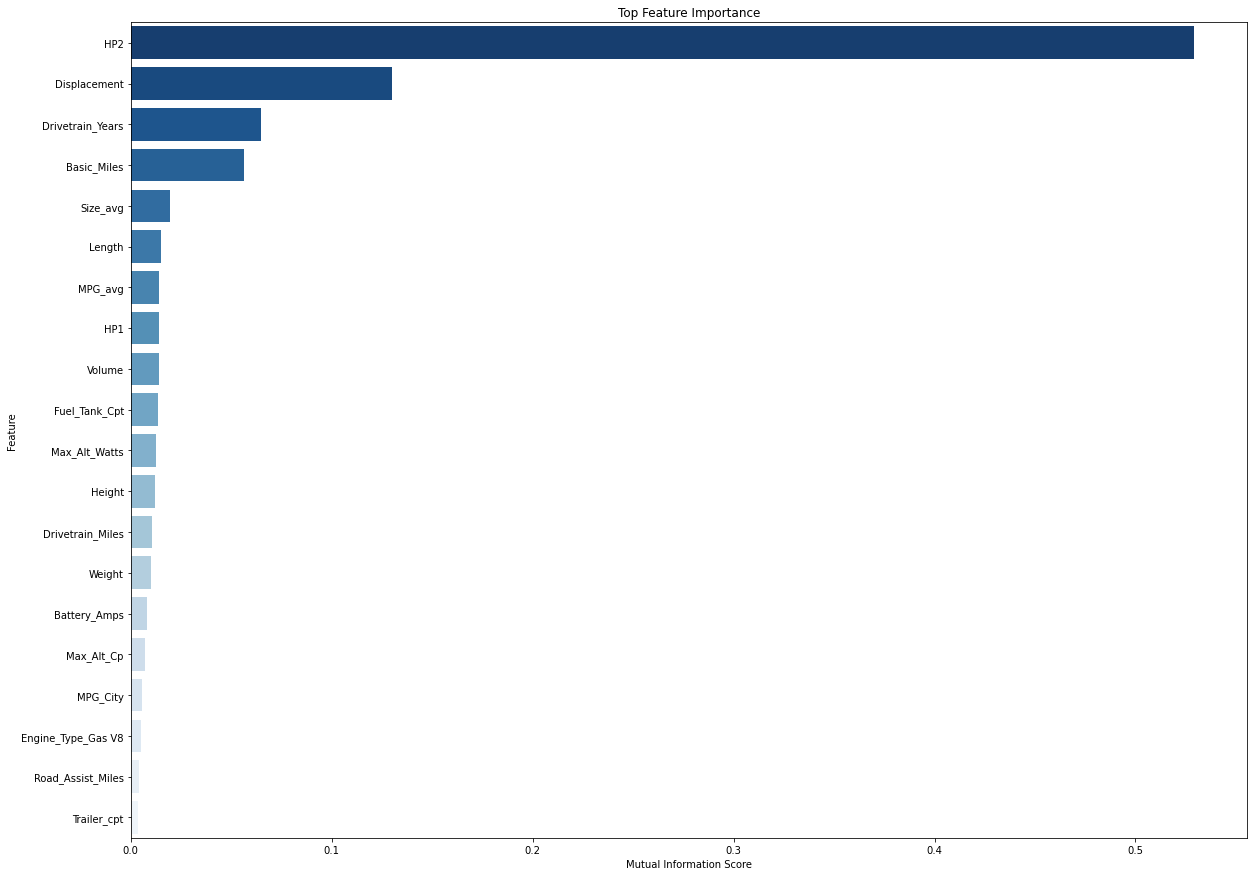

In [58]:
# top_features = np.array(feature_scores[:20])

f, axes = plt.subplots(figsize=(20,15))
ax = sns.barplot(x=importance_20['importance'],
                 y=importance_20['feature'],
                 palette = "Blues_r")
ax.set(title="Top Feature Importance", xlabel="Mutual Information Score", \
       ylabel="Feature")
plt.show()

Horsepower, displacement, drivetrain years and basic miles are the most important features.